<a href="https://colab.research.google.com/github/muskan-goel/ML-Hackathon-Projects/blob/main/h1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reading The Data**

In [178]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (6368, 15)
Test data shape: (3430, 14)


In [179]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [180]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [181]:
train['instock_date']=pd.to_datetime(train['instock_date'])

In [182]:
def get_year_month(train):
    train['instock_year']=train['instock_date'].dt.year
    train['instock_month']=train['instock_date'].dt.month
    train.drop(columns=['instock_date'],inplace=True)
    return train
train=get_year_month(train)

In [183]:
train.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month
0,BRAE2NF6JA5GUEXG,37.0,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8
1,TUNE8SFB6RJN2HSD,38.0,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3
2,BRAEAR7WZPQGPBZU,9.0,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8
3,WATDZ2ZQ8JPDHCTJ,50.0,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3
4,JWSEBUKYQPMBZ3RK,7.0,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3



**Some insights of the train data**

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   Market_Category   6368 non-null   int64  
 3   Customer_name     6157 non-null   object 
 4   Loyalty_customer  6368 non-null   object 
 5   Product_Category  6368 non-null   object 
 6   Grade             6368 non-null   int64  
 7   Demand            6368 non-null   int64  
 8   Discount_avail    6330 non-null   float64
 9   charges_1         6170 non-null   float64
 10  charges_2 (%)     6163 non-null   float64
 11  Minimum_price     6330 non-null   float64
 12  Maximum_price     6025 non-null   float64
 13  Selling_Price     6327 non-null   float64
 14  instock_year      6368 non-null   int64  
 15  instock_month     6368 non-null   int64  
dtypes: float64(7), int64(5), object(4)
memory 

In [104]:
train.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000,6368.000000,6368.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592,2015.319410,6.409862
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408,0.485751,3.326065
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000,2014.000000,1.000000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280,2015.000000,3.000000
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640,2015.000000,8.000000
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252,2016.000000,9.000000
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941,2016.000000,12.000000


In [184]:
sum(train['Selling_Price']<0)

14

In [106]:
train.shape

(6368, 16)

In [185]:
train = train[train.Selling_Price > 0]
train.shape

(6313, 16)

**Label Encoding**

In [186]:
from sklearn.preprocessing import LabelEncoder

le_lc=LabelEncoder()
le_pc=LabelEncoder()

train['Loyalty_customer']=le_lc.fit_transform(train['Loyalty_customer'])
train['Product_Category']=le_pc.fit_transform(train['Product_Category'])

In [187]:
train.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month
0,BRAE2NF6JA5GUEXG,37.0,2,Lillyann,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8
1,TUNE8SFB6RJN2HSD,38.0,24,Klynn,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3
2,BRAEAR7WZPQGPBZU,9.0,447,Ridge,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8
3,WATDZ2ZQ8JPDHCTJ,50.0,23,Abran,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3
4,JWSEBUKYQPMBZ3RK,7.0,63,Dustyn,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3


*dropping the columns not useful at all*

In [188]:
train.drop(columns=["Customer_name","instock_month","instock_year"],inplace=True)
train.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


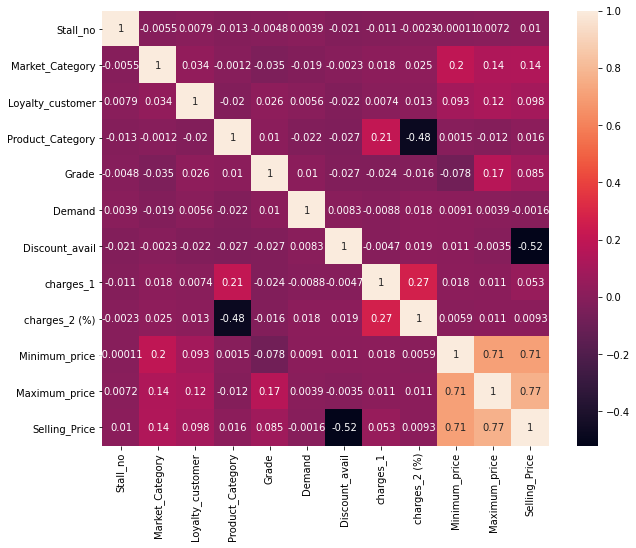

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)

In [190]:
import numpy as np
corr_matrix = train.corr().abs()
corr_matrix

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,0.005510,0.007874,0.012938,0.004814,0.003864,0.020568,0.010883,0.002274,0.000112,0.007195,0.010488
Market_Category,0.005510,1.000000,0.033993,0.001194,0.035270,0.019035,0.002265,0.018458,0.024758,0.196087,0.135300,0.140817
Loyalty_customer,0.007874,0.033993,1.000000,0.019560,0.025961,0.005584,0.021671,0.007357,0.012665,0.093103,0.118079,0.098101
Product_Category,0.012938,0.001194,0.019560,1.000000,0.010116,0.022469,0.027317,0.210196,0.476116,0.001523,0.012385,0.015742
Grade,0.004814,0.035270,0.025961,0.010116,1.000000,0.010351,0.026533,0.024284,0.015682,0.077558,0.166004,0.085304
Demand,0.003864,0.019035,0.005584,0.022469,0.010351,1.000000,0.008346,0.008754,0.017962,0.009128,0.003881,0.001620
Discount_avail,0.020568,0.002265,0.021671,0.027317,0.026533,0.008346,1.000000,0.004727,0.019177,0.010669,0.003494,0.519377
charges_1,0.010883,0.018458,0.007357,0.210196,0.024284,0.008754,0.004727,1.000000,0.271043,0.018015,0.011258,0.053202
charges_2 (%),0.002274,0.024758,0.012665,0.476116,0.015682,0.017962,0.019177,0.271043,1.000000,0.005911,0.010813,0.009285
Minimum_price,0.000112,0.196087,0.093103,0.001523,0.077558,0.009128,0.010669,0.018015,0.005911,1.000000,0.707846,0.705838


In [191]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                  Stall_no  Market_Category  ...  Maximum_price  Selling_Price
Stall_no               NaN          0.00551  ...       0.007195       0.010488
Market_Category        NaN              NaN  ...       0.135300       0.140817
Loyalty_customer       NaN              NaN  ...       0.118079       0.098101
Product_Category       NaN              NaN  ...       0.012385       0.015742
Grade                  NaN              NaN  ...       0.166004       0.085304
Demand                 NaN              NaN  ...       0.003881       0.001620
Discount_avail         NaN              NaN  ...       0.003494       0.519377
charges_1              NaN              NaN  ...       0.011258       0.053202
charges_2 (%)          NaN              NaN  ...       0.010813       0.009285
Minimum_price          NaN              NaN  ...       0.707846       0.705838
Maximum_price          NaN              NaN  ...            NaN       0.773227
Selling_Price          NaN              NaN  ...    

dropping the column with high correlation

In [192]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop) #none of the features are highly correlated, so no dropping required

[]


In [ ]:
#train.drop(columns=to_drop, inplace=True)
#train.head()

**Checking for missing data and replacing them with median**

In [193]:
def fillmedian(train):
    f = ['Stall_no','Discount_avail','charges_1','charges_2 (%)','Maximum_price','Minimum_price']
    for i in f:
        train[i] = train[i].fillna(train[i].median())
    return train

In [194]:
train=fillmedian(train)

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 0 to 6367
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6313 non-null   object 
 1   Stall_no          6313 non-null   float64
 2   Market_Category   6313 non-null   int64  
 3   Loyalty_customer  6313 non-null   int64  
 4   Product_Category  6313 non-null   int64  
 5   Grade             6313 non-null   int64  
 6   Demand            6313 non-null   int64  
 7   Discount_avail    6313 non-null   float64
 8   charges_1         6313 non-null   float64
 9   charges_2 (%)     6313 non-null   float64
 10  Minimum_price     6313 non-null   float64
 11  Maximum_price     6313 non-null   float64
 12  Selling_Price     6313 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 690.5+ KB


**Training the model**

In [196]:
X=train.drop(columns=['Product_id','Selling_Price']).values
y=train['Selling_Price'].values

In [197]:
X.shape

(6313, 11)

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(5050, 11)

In [199]:
X_test.shape

(1263, 11)

**Random Forest**

In [200]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=19, random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=19, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [201]:
from sklearn import metrics
y_pred = rf.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

85173.27283060903
0.990713412566683


**Predicting the SP with Test Data**

In [207]:
test = pd.read_csv("test.csv")
test.drop(columns=["Customer_name","instock_date"],axis=1,inplace=True)
test = fillmedian(test)

In [212]:
test.columns

Index(['Product_id', 'Stall_no', 'Market_Category', 'Loyalty_customer',
       'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'charges_2 (%)', 'Minimum_price', 'Maximum_price'],
      dtype='object')

In [223]:
test['Loyalty_customer']=le_lc.fit_transform(test['Loyalty_customer'])
test['Product_Category']=le_pc.fit_transform(test['Product_Category'])

In [218]:
yf = rf.predict(test.drop('Product_id',axis=1))

In [220]:
yf.shape

(3430,)

In [219]:
final = pd.DataFrame((zip(test['Product_id'],yf)),columns=['Product_id','Selling_Price'])
final.to_csv('submission1.csv',index= False)

**Linear Regression**

In [222]:
from sklearn.linear_model import LinearRegression
rf=LinearRegression()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

706280.5924863383
0.9229930205027627


In [224]:
test = pd.read_csv("test.csv")
test.drop(columns=["Customer_name","instock_date"],axis=1,inplace=True)
test = fillmedian(test)

In [225]:
test['Loyalty_customer']=le_lc.fit_transform(test['Loyalty_customer'])
test['Product_Category']=le_pc.fit_transform(test['Product_Category'])

In [226]:
yf = rf.predict(test.drop('Product_id',axis=1))

In [227]:
final = pd.DataFrame((zip(test['Product_id'],yf)),columns=['Product_id','Selling_Price'])
final.to_csv('submission2.csv',index= False)